In [13]:
# Initial PCA

import os
import numpy as np

# Path to your folder containing the .npy files
data_dir = "/Users/tobyokeefe/git/Myocardial-Prediction-Pipeline/data/training_data/mixed_samples"

# List all .npy files in the folder
npy_files = [f for f in os.listdir(data_dir) if f.endswith('.npy')]
print(len(npy_files))

# Sort them (optional but useful for consistent order)
npy_files.sort()


flattened_data = []

for file in npy_files:
    # Load file
    arr = np.load(os.path.join(data_dir, file))
       # shape (10, 18000, 4)
    
    # Take only first 3 columns (x, y, z)
    arr_xyz = arr[0, :, :3]       
                 # shape (18000, 3)
    
    
    arr_flat = arr_xyz.reshape(1, -1)     # shape (1, 18000*3)
    print(arr_flat.shape)                     
    
    
    flattened_data.append(arr_flat)

# Concatenate across all files → shape (N, 3*M)
flattened_data = np.vstack(flattened_data)

print("Final shape:", flattened_data.shape)


900
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54000)
(1, 54

Unique labels: [0. 1. 2.]
Counts per label: [60000 60000 60000]
Number of unique labels: 3


/opt/homebrew/Caskroom/miniconda/base/envs/myocardinal_env/lib/python3.11/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


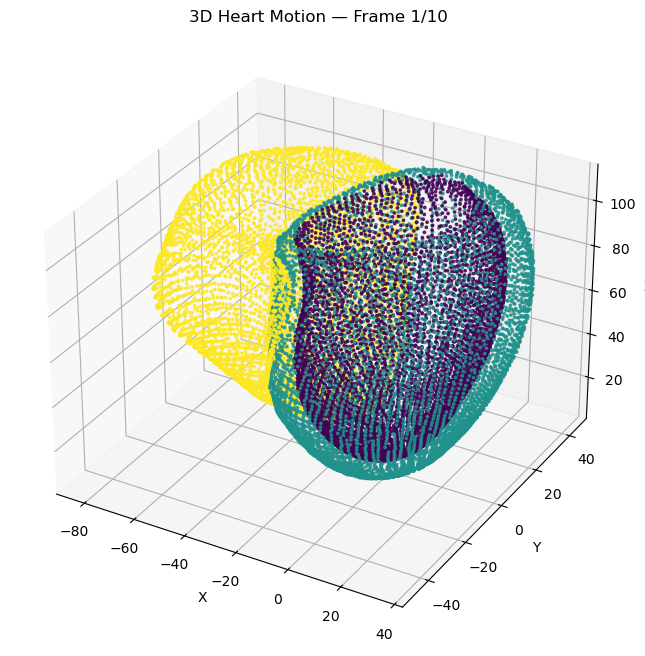

In [11]:
import numpy as np
from IPython.display import Video
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Load data
file_path = "/Users/tobyokeefe/git/Myocardial-Prediction-Pipeline/data/training_data/mixed_samples/0healthy.npy"
arr = np.load(file_path)   # shape (10, 18000, 4)

# Split coordinates and labels
coords = arr[:, :, :3]     # (10, 18000, 3)
labels = arr[:, :, 3]      # (10, 18000)
# Flatten to a 1D array (combine all frames)
all_labels = labels.flatten()

# Get unique label values and their counts
unique_labels, counts = np.unique(all_labels, return_counts=True)

print("Unique labels:", unique_labels)
print("Counts per label:", counts)
print("Number of unique labels:", len(unique_labels))

# Create figure and 3D axes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot first frame
sc = ax.scatter(coords[0, :, 0], coords[0, :, 1], coords[0, :, 2],
                c=labels[0], cmap='viridis', s=3, alpha=0.8)

ax.set_title("3D Heart Motion Over Time")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Set consistent view limits
xlim = (coords[:, :, 0].min(), coords[:, :, 0].max())
ylim = (coords[:, :, 1].min(), coords[:, :, 1].max())
zlim = (coords[:, :, 2].min(), coords[:, :, 2].max())

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)

# === Animation function ===
def update(frame):
    sc._offsets3d = (
        coords[frame, :, 0],
        coords[frame, :, 1],
        coords[frame, :, 2]
    )
    sc.set_array(labels[frame])  # update color values
    ax.set_title(f"3D Heart Motion — Frame {frame + 1}/10")
    return sc,

# Create animation
ani = FuncAnimation(fig, update, frames=10, interval=500, blit=False)

ani.save("heart_animation.mp4", writer="ffmpeg", fps=5)
Video("heart_animation.mp4")



Unique labels: [0. 1. 2.]
Counts per label: [60000 60000 60000]
Number of unique labels: 3


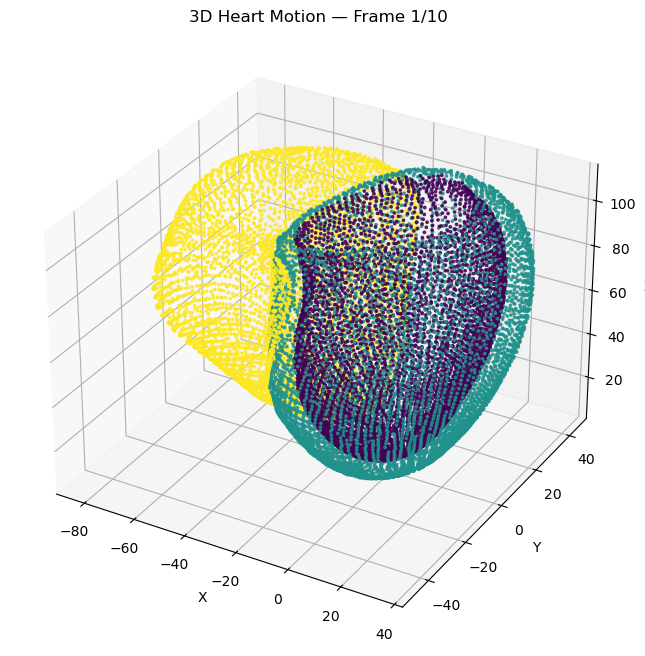

In [12]:
import numpy as np
from IPython.display import Video
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Load data
file_path = "/Users/tobyokeefe/git/Myocardial-Prediction-Pipeline/data/training_data/mixed_samples/0healthy.npy"
arr = np.load(file_path)   # shape (10, 18000, 4)

# Split coordinates and labels
coords = arr[:, :, :3]     # (10, 18000, 3)
labels = arr[:, :, 3]      # (10, 18000)
# Flatten to a 1D array (combine all frames)
all_labels = labels.flatten()

# Get unique label values and their counts
unique_labels, counts = np.unique(all_labels, return_counts=True)

print("Unique labels:", unique_labels)
print("Counts per label:", counts)
print("Number of unique labels:", len(unique_labels))

# Create figure and 3D axes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot first frame
sc = ax.scatter(coords[0, :, 0], coords[0, :, 1], coords[0, :, 2],
                c=labels[0], cmap='viridis', s=3, alpha=0.8)

ax.set_title("3D Heart Motion Over Time")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Set consistent view limits
xlim = (coords[:, :, 0].min(), coords[:, :, 0].max())
ylim = (coords[:, :, 1].min(), coords[:, :, 1].max())
zlim = (coords[:, :, 2].min(), coords[:, :, 2].max())

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)

# === Animation function ===
def update(frame):
    sc._offsets3d = (
        coords[frame, :, 0],
        coords[frame, :, 1],
        coords[frame, :, 2]
    )
    sc.set_array(labels[frame])  # update color values
    ax.set_title(f"3D Heart Motion — Frame {frame + 1}/10")
    return sc,

# Create animation
ani = FuncAnimation(fig, update, frames=10, interval=500, blit=False)

ani.save("heart_animation.mp4", writer="ffmpeg", fps=5)
Video("heart_animation.mp4")



Loaded flattened data shape: (9000, 54000)
Running PCA -> 50 components...
Explained variance (first 10 PCA comps): [0.3794, 0.2385, 0.1109, 0.0511, 0.0249, 0.0164, 0.0131, 0.0098, 0.0054, 0.0038]
Cumulative explained variance: [0.3794 0.6179 0.7288 0.7799 0.8048 0.8212 0.8343 0.8441 0.8494 0.8532]
k=2: inertia=3.07e+08, silhouette=0.6172
k=3: inertia=2.30e+08, silhouette=0.2531
k=4: inertia=1.98e+08, silhouette=0.2276
k=5: inertia=1.80e+08, silhouette=0.1971
k=6: inertia=1.68e+08, silhouette=0.1837
k=7: inertia=1.57e+08, silhouette=0.1869
k=8: inertia=1.51e+08, silhouette=0.1859


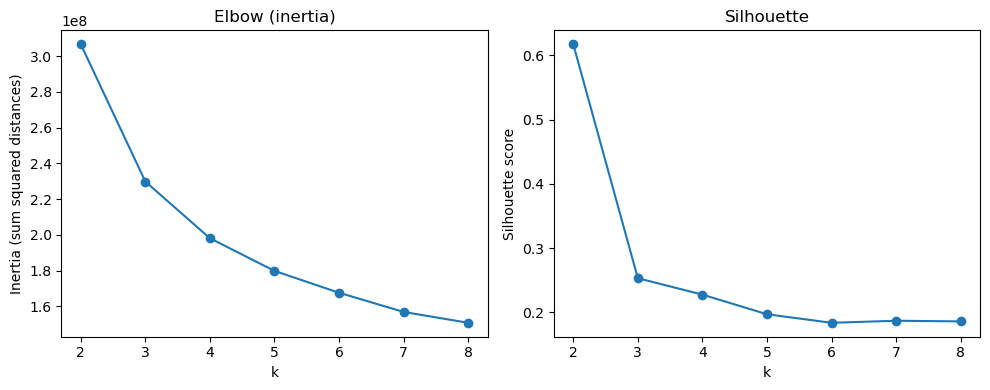

Using k_final = 4
Cluster sizes:
cluster
0    3401
1    2880
2    2316
3     403
Name: count, dtype: int64
   cluster        mean         std  count
0        0  130.412970   35.538926   3401
1        1  131.210807   36.618132   2880
2        2  136.261887   39.188176   2316
3        3  225.550437  196.413846    403
Saved cluster assignments to cluster_assignments.csv

Cluster 0: 3401 members, mean dist 130.4130


ValueError: num must be an integer with 1 <= num <= 6, not 7

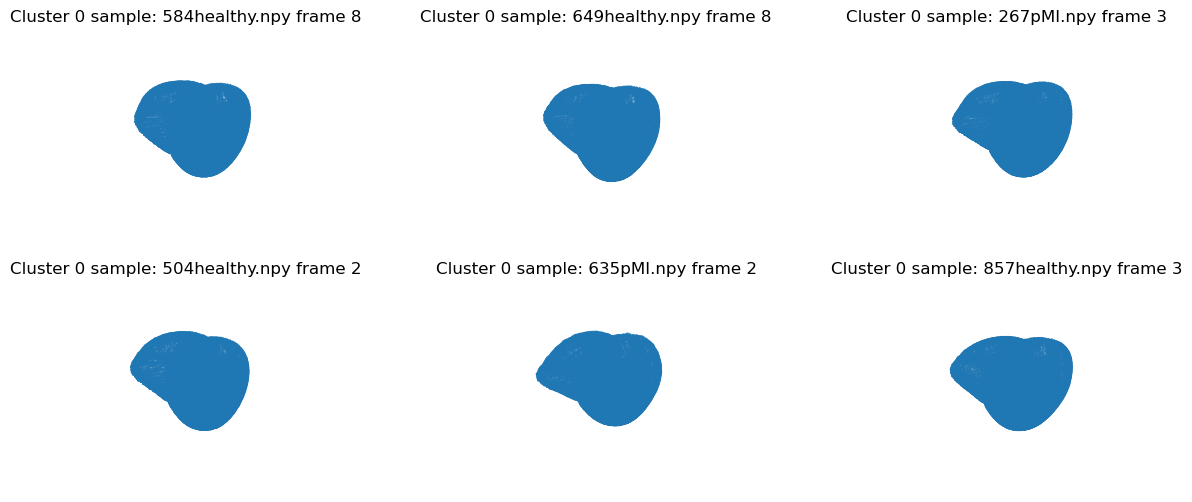

In [15]:
# Clustering pipeline to find abnormal anatomies
import os
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (3D projection)
import random

# ----------------------------------------
# USER CONFIG
data_dir = "/Users/tobyokeefe/git/Myocardial-Prediction-Pipeline/data/training_data/mixed_samples"   # folder with many .npy files
n_pca_components = 50     # reduce to this many PCA dims for clustering (tune)
try_k = range(2, 9)       # K values to evaluate
random_state = 144
n_examples_per_cluster = 6
# ----------------------------------------

# 1) Load and flatten all frames from all files
paths = sorted([p for p in Path(data_dir).iterdir() if p.suffix == ".npy"])
flattened_list = []      # list of 1D arrays (one row per frame)
meta = []                # list of tuples (filename, frame_index)
for p in paths:
    arr = np.load(p)            # shape e.g. (10, M, 4)
    n_frames = arr.shape[0]
    for f in range(n_frames):
        xyz = arr[f, :, :3]    # (M, 3)
        flattened = xyz.reshape(-1)   # (3*M,)
        flattened_list.append(flattened)
        meta.append((str(p.name), int(f)))

X = np.vstack(flattened_list)   # shape (N_total_frames, 3*M)
print("Loaded flattened data shape:", X.shape)
N, D = X.shape

# 2) Standardize (important for PCA/KMeans)
scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)

# 3) PCA dimensionality reduction
print(f"Running PCA -> {n_pca_components} components...")
pca = PCA(n_components=n_pca_components, random_state=random_state)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance (first 10 PCA comps):", np.round(pca.explained_variance_ratio_[:10], 4).tolist())
print("Cumulative explained variance:", np.round(np.cumsum(pca.explained_variance_ratio_)[:10], 4))

# 4) Choose K (elbow + silhouette)
inertia = []
sil_scores = []
for k in try_k:
    km = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    labels_k = km.fit_predict(X_pca)
    inertia.append(km.inertia_)
    sil = silhouette_score(X_pca, labels_k) if k > 1 else np.nan
    sil_scores.append(sil)
    print(f"k={k}: inertia={km.inertia_:.2e}, silhouette={sil:.4f}")

# plot diagnostics
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(list(try_k), inertia, '-o')
plt.xlabel("k"); plt.ylabel("Inertia (sum squared distances)"); plt.title("Elbow (inertia)")
plt.subplot(1,2,2)
plt.plot(list(try_k), sil_scores, '-o')
plt.xlabel("k"); plt.ylabel("Silhouette score"); plt.title("Silhouette")
plt.tight_layout()
plt.show()

# Choose final k (either from plots or pick one)
k_final = 4   # <-- tune this after viewing the plots
print("Using k_final =", k_final)

kmeans = KMeans(n_clusters=k_final, random_state=random_state, n_init=20)
cluster_labels = kmeans.fit_predict(X_pca)

# 5) Diagnostics per cluster
df_meta = pd.DataFrame(meta, columns=["filename", "frame"])
df_meta["cluster"] = cluster_labels

counts = df_meta["cluster"].value_counts().sort_index()
print("Cluster sizes:")
print(counts)

# mean distance to centroid in PCA space (a measure of compactness)
centroids = kmeans.cluster_centers_
dists = np.linalg.norm(X_pca - centroids[cluster_labels], axis=1)
df_meta["dist_to_centroid"] = dists
cluster_stats = df_meta.groupby("cluster")["dist_to_centroid"].agg(["mean", "std", "count"]).reset_index()
print(cluster_stats)

# 6) Save assignments for manual inspection
out_csv = "cluster_assignments.csv"
df_meta.to_csv(out_csv, index=False)
print("Saved cluster assignments to", out_csv)

# Helper to inverse transform a PCA vector to original coordinates (3*M)
def pca_to_xyz_flat(pca_vec):
    # pca_vec expected in PCA space (1D length n_pca_components)
    scaled_back = pca.inverse_transform(pca_vec.reshape(1, -1))  # to scaled feature space
    original = scaler.inverse_transform(scaled_back)             # to original flat coordinates
    flat = original.reshape(-1)
    return flat

# 7) Visualize example anatomies per cluster and cluster centroid
def plot_3d_points(ax, pts_xyz, s=1, cmap=None, colors=None):
    x = pts_xyz[:,0]; y = pts_xyz[:,1]; z = pts_xyz[:,2]
    if colors is None:
        ax.scatter(x, y, z, s=s, alpha=0.6)
    else:
        ax.scatter(x, y, z, c=colors, cmap=cmap, s=s, alpha=0.8)

import math

for cl in sorted(df_meta["cluster"].unique()):
    members = df_meta[df_meta["cluster"] == cl]
    print(f"\nCluster {cl}: {len(members)} members, mean dist {members['dist_to_centroid'].mean():.4f}")
    # sample a few members to plot
    sample_rows = members.sample(n=min(n_examples_per_cluster, len(members)), random_state=random_state)
    
    fig = plt.figure(figsize=(15, 3*math.ceil(len(sample_rows)/3)))
    for i, (_, row) in enumerate(sample_rows.iterrows()):
        fname = row["filename"]; frame = int(row["frame"])
        arr = np.load(os.path.join(data_dir, fname))
        pts = arr[frame, :, :3]   # (M,3)
        ax = fig.add_subplot(math.ceil(len(sample_rows)/3), 3, i+1, projection='3d')
        plot_3d_points(ax, pts, s=1)
        ax.set_title(f"Cluster {cl} sample: {fname} frame {frame}")
        ax.set_axis_off()
    
    # Plot cluster centroid shape (inverse PCA centroid)
    centroid_pca = centroids[cl]
    centroid_flat = pca_to_xyz_flat(centroid_pca).reshape(-1, 3)  # (M,3)
    axc = fig.add_subplot(math.ceil(len(sample_rows)/3), 3, len(sample_rows)+1, projection='3d')
    plot_3d_points(axc, centroid_flat, s=1, cmap='viridis')
    axc.set_title(f"Cluster {cl} centroid shape")
    axc.set_axis_off()
    plt.tight_layout()
    plt.show()

# 8) Additional guidance:
print("""
How to identify the 'bad' cluster(s):
 - Look for small clusters (very few members) — often errors cluster together.
 - Look at cluster centroid shapes: do any look noisy / broken / far away from mean?
 - Check 'mean dist_to_centroid' — clusters with very large mean distance may be heterogeneous or contain bad reconstructions.
 - Inspect several members visually (we plotted samples above).
 - If uncertain, label a few examples from a suspect cluster as 'bad' and then consider
   training a binary classifier (semi-supervised) to flag others automatically.
""")